# Họ và Tên : Hồ Phi Anh
# MSSV: 2174802010765

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng median filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Sobel filter để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi thứ tự các kênh màu (ví dụ: BGR → GRB hoặc GBR...) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu LAB và tách riêng 3 kênh L, A, B, lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm)


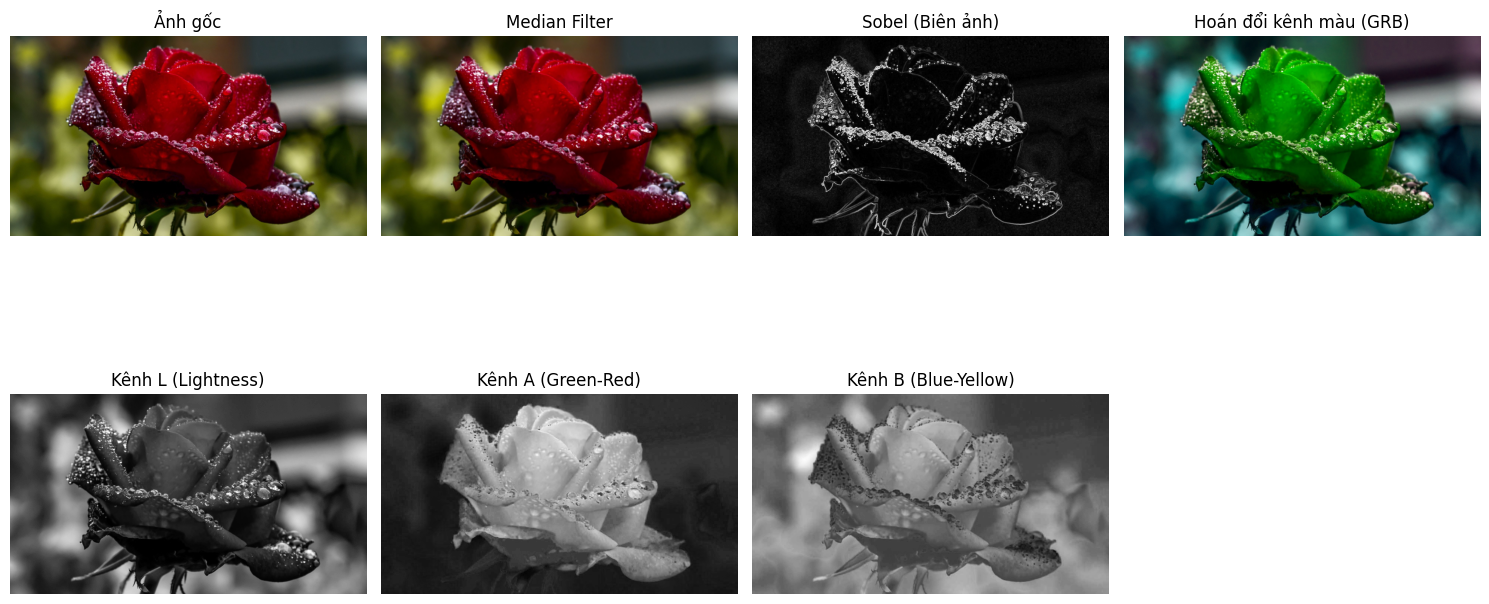

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


filepath = 'exercise/a.jpg'
basename = 'a'  
img = cv2.imread(filepath)
# Kiểm tra ảnh 
if img is None:
    print("❌ Không thể đọc ảnh. Hãy kiểm tra lại đường dẫn hoặc tên file.")
else:
    # 1. Median Filter để làm mịn ảnh 
    median_filtered = cv2.medianBlur(img, 5)
    cv2.imwrite(f'{basename}_median.jpg', median_filtered)

    # 2. Sobel Filter để phát hiện biên
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))
    cv2.imwrite(f'{basename}_sobel.jpg', sobel_combined)

    # 3. Hoán đổi thứ tự kênh màu (BGR → GRB)
    swapped = img[:, :, [1, 2, 0]]  # GRB
    cv2.imwrite(f'{basename}_swapped.jpg', swapped)

    # 4. Chuyển sang LAB và tách 3 kênh 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
    L, A, B = cv2.split(lab)
    cv2.imwrite(f'{basename}_L.jpg', L)
    cv2.imwrite(f'{basename}_A.jpg', A)
    cv2.imwrite(f'{basename}_B.jpg', B)

    # ket qua
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    median_rgb = cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB)
    swapped_rgb = cv2.cvtColor(swapped, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 8))

    plt.subplot(2, 4, 1)
    plt.imshow(img_rgb)
    plt.title("Ảnh gốc")
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.imshow(median_rgb)
    plt.title("Median Filter")
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title("Sobel (Biên ảnh)")
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.imshow(swapped_rgb)
    plt.title("Hoán đổi kênh màu (GRB)")
    plt.axis('off')

    plt.subplot(2, 4, 5)
    plt.imshow(L, cmap='gray')
    plt.title("Kênh L (Lightness)")
    plt.axis('off')

    plt.subplot(2, 4, 6)
    plt.imshow(A, cmap='gray')
    plt.title("Kênh A (Green-Red)")
    plt.axis('off')

    plt.subplot(2, 4, 7)
    plt.imshow(B, cmap='gray')
    plt.title("Kênh B (Blue-Yellow)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()



### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật lọc và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Gaussian Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Median Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Bilateral Filter (tham số ngẫu nhiên) (0.5 điểm)  
* Canny Edge Detection (thresholds ngẫu nhiên 50–150) (0.5 điểm)  
* Erosion (kernel 2x2 đến 5x5 ngẫu nhiên) (0.5 điểm)  
* Dilation (tương tự Erosion) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* B: Gaussian Blur  
* M: Median Blur  
* F: Bilateral Filter  
* E: Canny Edge  
* R: Erosion  
* D: Dilation (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_blur_dog.jpg`, `result_canny_image2.jpg` (0.5 điểm)


Nhấn phím để chọn phương pháp xử lý ảnh:
G - Gaussian Blur
M - Median Blur
F - Bilateral Filter
E - Canny Edge Detection
R - Erosion
D - Dilation
Q - Thoát


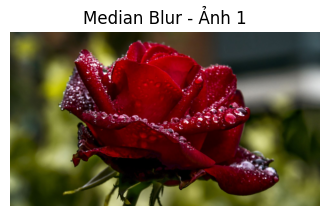

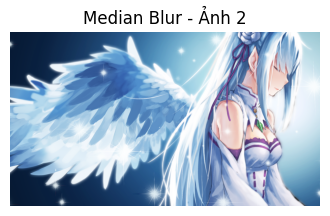

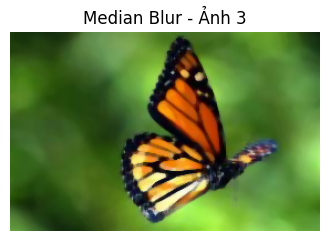

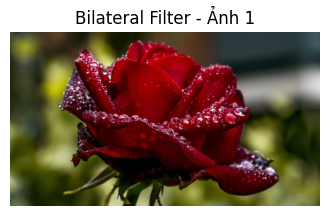

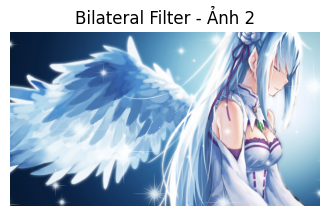

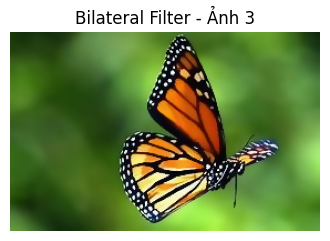

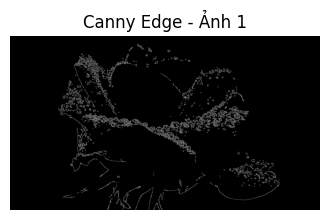

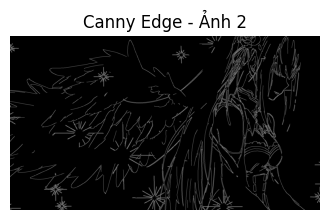

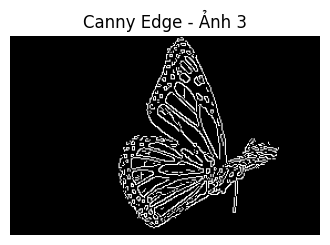

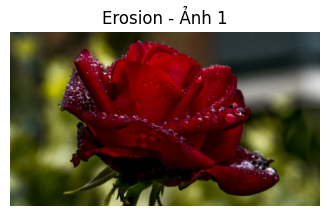

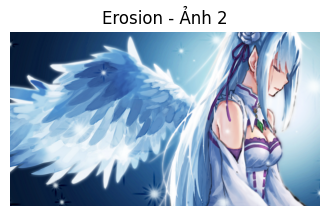

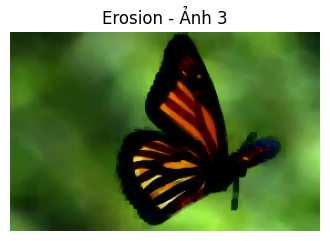

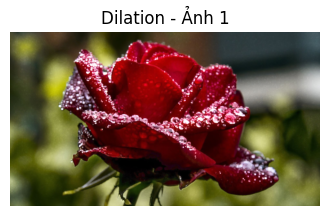

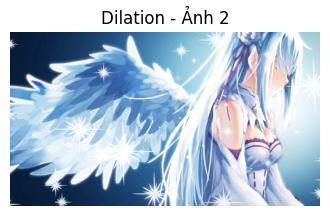

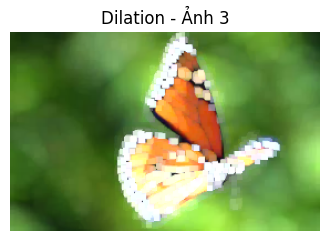

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

folder = "exercise"
image_names = ["a.jpg", "b.jpg", "c.jpg"]
image_paths = [os.path.join(folder, name) for name in image_names]
images = [cv2.imread(path) for path in image_paths]

# Hàm xử lý
def apply_processing(choice, images):
    processed_images = []
    method = ""

    for img in images:
        if choice == 'G':
            processed = cv2.GaussianBlur(img, (5, 5), 0)
            method = "Gaussian Blur"
        elif choice == 'M':
            processed = cv2.medianBlur(img, 5)
            method = "Median Blur"
        elif choice == 'F':
            processed = cv2.bilateralFilter(img, 9, 75, 75)
            method = "Bilateral Filter"
        elif choice == 'E':
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            edges = cv2.Canny(gray, 100, 200)
            processed = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
            method = "Canny Edge"
        elif choice == 'R':
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
            processed = cv2.erode(img, kernel)
            method = "Erosion"
        elif choice == 'D':
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
            processed = cv2.dilate(img, kernel)
            method = "Dilation"
        else:
            processed = img
            method = "Không xử lý"

        processed_images.append(processed)

    return processed_images, method

# Hiển thị menu
print("Nhấn phím để chọn phương pháp xử lý ảnh:")
print("G - Gaussian Blur")
print("M - Median Blur")
print("F - Bilateral Filter")
print("E - Canny Edge Detection")
print("R - Erosion")
print("D - Dilation")
print("Q - Thoát")

while True:
    choice = input("Nhập lựa chọn (G/M/F/E/R/D hoặc Q để thoát): ").upper()
    if choice == 'Q':
        break

    processed_images, method = apply_processing(choice, images)

    # Hiển thị ảnh
    for i, img in enumerate(processed_images):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(4,4))
        plt.imshow(img_rgb)
        plt.title(f"{method} - Ảnh {i+1}")
        plt.axis('off')
        plt.show()


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Tăng kích thước ảnh đầu tiên thêm 35 pixel ở mỗi cạnh. (0.5 điểm)  
* Xoay ảnh thứ hai 135 độ và lật ngang. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 5 lần và làm mịn bằng Gaussian blur kernel 9x9. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba bằng công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.5, 2.0], \quad \beta \in [-50, 50]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


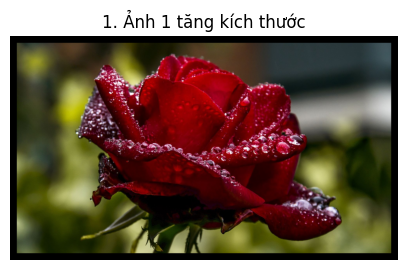

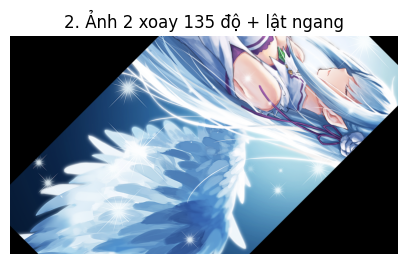

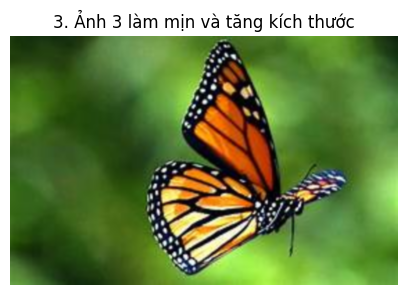

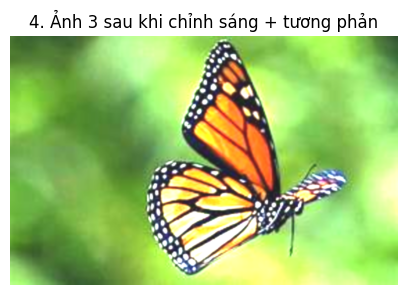

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img1 = cv2.imread("exercise/a.jpg")  
img2 = cv2.imread("exercise/b.jpg")  
img3 = cv2.imread("exercise/c.jpg")   

#1. Tăng kích thước ảnh đầu tiên thêm 35 pixel mỗi cạnh 
border_size = 35
img1_bordered = cv2.copyMakeBorder(
    img1, border_size, border_size, border_size, border_size, 
    cv2.BORDER_CONSTANT, value=(0, 0, 0)  
)

#2. Xoay ảnh thứ hai 135 độ và lật ngang
(h2, w2) = img2.shape[:2]
center = (w2 // 2, h2 // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 135, 1.0)
img2_rotated = cv2.warpAffine(img2, rotation_matrix, (w2, h2))
img2_flipped = cv2.flip(img2_rotated, 1)  # lật ngang

#3. Tăng kích thước ảnh thứ ba lên 5 lần và làm mịn
img3_scaled = cv2.resize(img3, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
img3_blurred = cv2.GaussianBlur(img3_scaled, (9, 9), 0)

#4. Thay đổi độ sáng và tương phản ảnh thứ ba
alpha = 1.5  # hệ số tương phản (thay đổi trong [0.5, 2.0])
beta = 30    # hệ số sáng (thay đổi trong [-50, 50])

# Công thức
img3_brightness_contrast = np.clip(alpha * img3_blurred + beta, 0, 255).astype(np.uint8)

# kết quả
titles = [
    "1. Ảnh 1 tăng kích thước", 
    "2. Ảnh 2 xoay 135 độ + lật ngang", 
    "3. Ảnh 3 làm mịn và tăng kích thước", 
    "4. Ảnh 3 sau khi chỉnh sáng + tương phản"
]
images = [img1_bordered, img2_flipped, img3_blurred, img3_brightness_contrast]

for i in range(4):
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
    plt.show()


# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.